In [49]:
# 1. Use sklearn library to generate the synthetic data for k-means clustering.
# α. We set the total number of instances to be 300
# β. The number of centers is 4 with the standard deviation 0.6

import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits import mplot3d
from sklearn.metrics import pairwise_distances_argmin
#you can use Python’s imaging library (PIL)
from PIL import Image
from IPython.display import display
import scipy.cluster.hierarchy as sch #you only for sch.dendrogram

df = pd.read_csv('Mall_Customers.csv')
with pd.option_context('future.no_silent_downcasting', True):
    df["Gender"] = df["Gender"].replace(to_replace=['Male', 'Female'], value=[-1, 1]).infer_objects() 
df = df.drop('CustomerID', axis=1) 
X_mail = df.values

In [50]:
# image = cv2.imread('cropped.jpg')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# pixels = image.reshape(-1, 3)

img = Image.open('cropped.jpg').convert('RGB')
img = img.resize((300, int(img.height * (300 / img.width))))
# Convert image to a NumPy array
img_data = np.array(img)
# Get the shape of the image
h, w, c = img_data.shape
# Reshape the image to a 2D array of pixels (each pixel is a row)
pixels = img_data.reshape(-1, 3)

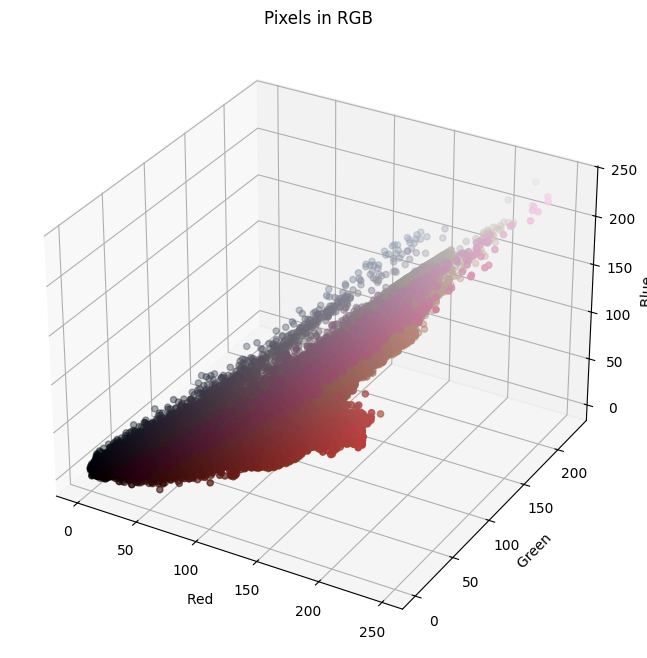

In [51]:
# Plot the RGB values in 3D space (optional for visualization)
def plot_pixels_3D(pixels):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    # Plot the pixels in 3D RGB space
    ax.scatter(pixels[:, 0], pixels[:, 1], pixels[:, 2], c=pixels / 255.0, marker='o')
    ax.set_xlabel('Red ')
    ax.set_ylabel('Green ')
    ax.set_zlabel('Blue ')
    plt.title('Pixels in RGB')
    plt.show()

plot_pixels_3D(pixels)

In [52]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6,random_state=4)
print (len(X))
print(len(y))
#print (X)
#Questions : do i need to apply the elbow method? DO i need to apply the quatitative analysis to compare both reuslts?

300
300


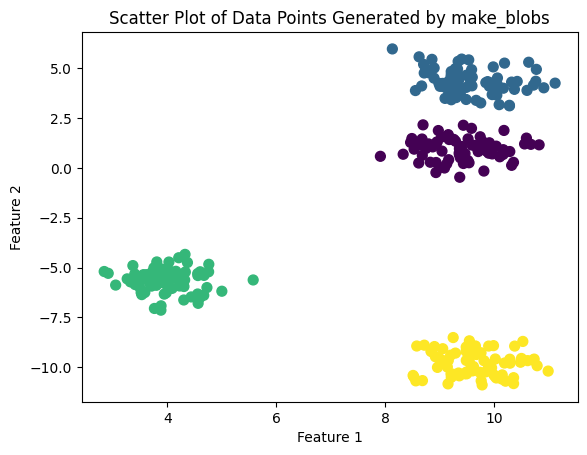

In [53]:
#2. Plot the generated data with labels by using matplotlib
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.title('Scatter Plot of Data Points Generated by make_blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [54]:
#3. Implement the K-means function return the labels and centers

k_1 = 4 #change this to the elbow method
max_iterations_1=1000


def euclidean_dist (x1,x2):
    return np.sqrt(np.sum(x1-x2)**2)

def k_algorithm(X_data, k_val, max_iterations, seed=None):
    # Set the random seed if provided
    if seed is not None:
        np.random.seed(seed)
    #Initialize the centroids to random points in the graph
    # Step 1: Randomly initialize centroids by choosing k random points from the dataset
    initial_indices = np.random.choice(len(X_data), size=k_val, replace=False)
    centroids = X_data[initial_indices]
    for iteration in range(max_iterations):
        # Step 2: Assign each point to the nearest centroid
        labels = []
        for point in X_data:
            # Step 2: Assign each point to the nearest centroid using pairwise_distances_argmin
            labels = pairwise_distances_argmin(X_data, centroids)
        new_centroids = []
        for i in range(k_val):
            cluster_points = X_data[labels == i] #select the values of X that was assigned to a detemrined clusters, cluster i
            if len(cluster_points) > 0:
                new_centroid = np.mean(cluster_points, axis=0) #create new cluster that will be the mean of the data points inside it
            else:
                new_centroid = centroids[i] #if the cluster is empty then do not make any change, just report that value
            new_centroids.append(new_centroid)
        new_centroids = np.array(new_centroids) #trasnform to an array for easier manipulation
        # Check for convergence (if centroids do not change, stop)
        if np.all(centroids == new_centroids):
            break
        # Update centroids for the next iteration
        centroids = new_centroids
    return centroids, labels



In [55]:
#Function to plot the results

def plot_k (x_val1, centers_val):
    plt.scatter(x_val1[:, 0], x_val1[:, 1], c=y, s=50, cmap='viridis')
    plt.scatter(centers_val[:, 0], centers_val[:, 1], color='red', marker='x', s=200, label='Centroids')
    plt.title('Scatter Plot of Data Points Generated by make_blobs')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

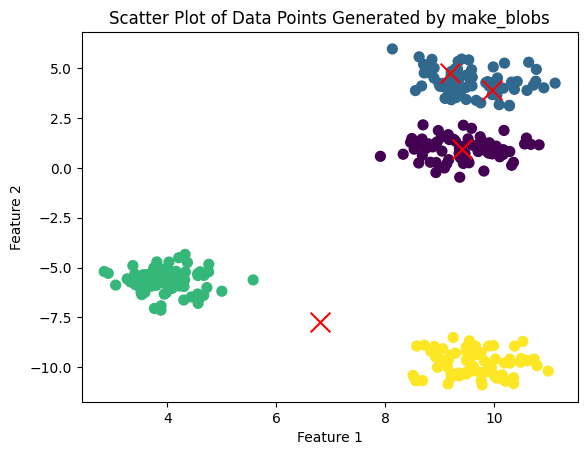

In [56]:
#4. Fit the model on the dataset (default seed) and plot the figure
centroids_k_default,labels_k_default= k_algorithm(X, k_1, max_iterations_1, seed=None)

plot_k (X, centroids_k_default)


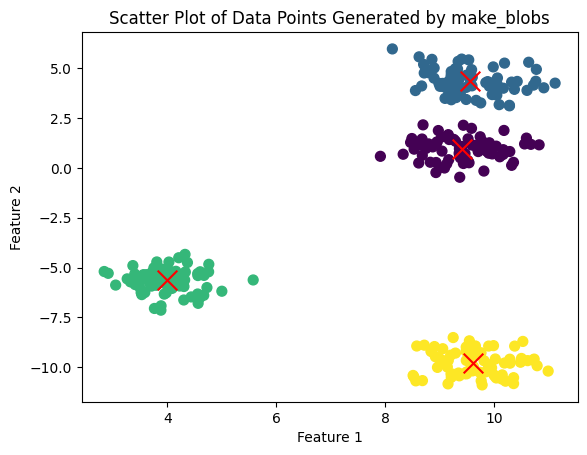

In [57]:
#5. Fit the model on the dataset (seed=2) and plot the figure
centroids_k_seed2,labels_k_seed2= k_algorithm(X, k_1, max_iterations_1, seed=2)
plot_k (X, centroids_k_seed2)


In [58]:
#6. Implement the K-means++ function return the labels and centers
k=4
def k_plus_algorithm(X_data, k_val, seed=None):
    # Set the random seed if provided
    labels2=[]
    if seed is not None:
        np.random.seed(seed)
    #Initialize the centroids to random points in the graph
    centroids = [X_data[np.random.randint(0, len(X_data))]]
    while len(centroids)<k_val:
        min_distances =[]
        for iterator in X_data:
            #measure the distance between each point and the centroid
            min_dist = np.min([euclidean_dist(iterator, center_it)**2 for center_it in centroids])
            min_distances.append(min_dist)
        prob = min_distances/(np.sum(min_distances)) 
        new_center = X[np.random.choice(len(X_data), p=prob)]
        centroids.append(new_center)
    return np.array(centroids)

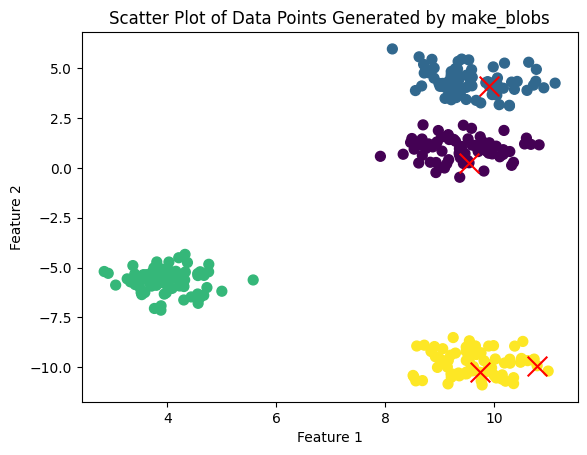

In [59]:
#7. Fit the model on the dataset (default seed) and plot the figure
centroids_k_plus_default =k_plus_algorithm(X, k, seed=None)
plot_k (X, centroids_k_plus_default)

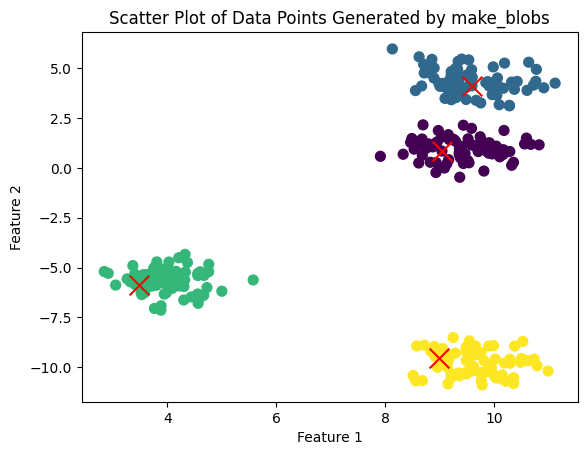

In [60]:
#8. Fit the model on the dataset (seed=2) and plot the figure
centroids_k_plus_seed2 =k_plus_algorithm(X, k,seed=2)
plot_k (X, centroids_k_plus_seed2)

In [61]:
#Plot Image
def plot_image (centroids,labels):
    # Replace each pixel with its corresponding centroid color
    segmented= centroids[labels].reshape(h, w, c).astype('uint8')
    # Display the original image
    # plt.imshow(img)
    # plt.title('Original Image')
    # plt.axis('off')
    # plt.show()
    # Display the segmented image
    plt.imshow(segmented)
    plt.title('Image Segmented')
    plt.axis('off')
    plt.show()

In [62]:
#Try with the photo dataset 
k_2=3
iterations_photo=50
centroids_k_default_photo,labels_k_default_photo= k_algorithm(pixels, k_2, iterations_photo, seed=None)
plot_image(centroids_k_default_photo,labels_k_default_photo)

KeyboardInterrupt: 

In [ ]:
#5. Fit the model on the dataset (seed=2) and plot the figure
centroids_k_seed2_photo,labels_k_seed2_photo= k_algorithm(pixels, k_1, iterations_photo, seed=2)
plot_image(centroids_k_seed2_photo, labels_k_seed2_photo)


In [ ]:
#Kplus default
centroids_k_plus_default =k_plus_algorithm(pixels, k_1, seed=None)
plot_k (centroids_k_plus_default, labels_k_default_photo)

In [ ]:
#Kplus seed =2
centroids_k_plus_seed2_photo =k_plus_algorithm(pixels, k,seed=2)
plot_k (centroids_k_plus_seed2_photo, labels_k_seed2_photo)

In [31]:
#9. Compare the results from 4,5,7 and 8. State your observations

#In the case of 

In [32]:
#Implement a hierarchical clustering model using Ward distance and plot the dendrogram.
# Compute the proximity matrix
# Let each data point be a cluster
# Repeat: Merge the two closest clusters and update the proximity matrix
# Until only a single cluster remains

# Calculate the centroid (mean) of a cluster
def compute_centroid(cluster):
    return np.mean(cluster, axis=0)

# Calculate the within-cluster sum of squared distances
def within_cluster_sse(cluster, centroid):
    return np.sum([euclidean_dist(point, centroid) for point in cluster])

# Ward's method merging cost
def ward_formula(cluster_A, cluster_B):
    # Compute centroids for each cluster
    centroid_A = compute_centroid(cluster_A)
    centroid_B = compute_centroid(cluster_B)
    # Combine clusters A and B
    merged_list = list(cluster_A) + list(cluster_B)
    # Convert the merged list back to a NumPy array
    combined_cluster = np.array(merged_list)
    # Compute centroid for the combined cluster
    centroid_combined = compute_centroid(combined_cluster)
    # Compute sum of squared distances for clusters before and after merging
    SSE_combined = within_cluster_sse(combined_cluster, centroid_combined)
    SSE_A = within_cluster_sse(cluster_A, centroid_A)
    SSE_B = within_cluster_sse(cluster_B, centroid_B)
    # Compute the merging cost 
    delta = np.sqrt(2 * (SSE_combined - SSE_A - SSE_B))
    return delta

def hierarchical_clustering_ward (X_data):
    clusters = [[point] for point in X_data]  # Creating list of clusters from the points of x_data
    num_points = len(X_data)
    cluster_ids = list(range(num_points))  # Cluster IDs from 0 to num_points - 1
    next_cluster_id = num_points  # The next cluster will have an ID starting from num_points
    matrix = [] 
    while len(clusters) > 1:
        min_increase = float('inf') #initiakize to really big number
        clusters_to_merge = []
        # Find the pair of clusters with the smallest variance increase
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                variance_inc = ward_formula(np.array(clusters[i]), np.array(clusters[j]))
                if variance_inc < min_increase:
                    min_increase = variance_inc
                    clusters_to_merge = (i, j)
        # Merge the two clusters
        i, j = clusters_to_merge
        merged_list = list(clusters[i]) + list(clusters[j])
        # Convert the merged list back to a NumPy array to handle it more easily
        combined_cluster = np.array(merged_list)
        matrix.append([cluster_ids[i], cluster_ids[j], min_increase, 0]) #add the zero fro the plot step
        # Column 1 is the id of cluster A and column 2 is the id of cluster B
        # Column 3 is the distance between cluster A and cluster B
        # Column 4 is a column of zeros
        # Update cluster IDs: assign a new ID to the merged cluster
        cluster_ids[i] = next_cluster_id
        next_cluster_id += 1
        # Remove the second cluster (index j)
        cluster_ids.pop(j)
        clusters.pop(j)  # Remove the cluster with the larger index first to avoid index shifting
        clusters.pop(i) 
        clusters.append(combined_cluster)
    return clusters, matrix

In [33]:
#Plot the dendogram
def dendogram_matrix1 (x_data):
    _, dendrogram_matrix = hierarchical_clustering_ward(x_data)
    # Convert matrix to a numpy array for dendrogram plotting
    dendrogram_matrix = np.array(dendrogram_matrix)
    # Plot the dendrogram
    plt.figure()
    den = sch.dendrogram(dendrogram_matrix)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

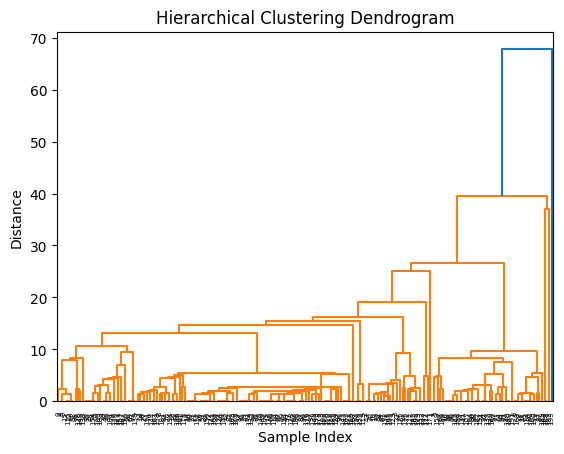

In [34]:
hierarchical_clustering_ward(X_mail)
dendogram_matrix1(X_mail)